In [81]:
#usefull libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns
import pandas as pd
import missingno as msno
#https://www.kaggle.com/code/residentmario/using-missingno-to-diagnose-data-sparsity/notebook
plt.style.use('seaborn')

In [82]:
#import the data
train_data=pd.read_csv('data/Corona_NLP_train.csv',encoding='latin1')
test_data=pd.read_csv('data/Corona_NLP_test.csv',encoding='latin1')

## Multiclass classification
### An example using tweets about COVID-19
Multiclass classification in Machine Learning is a task related to classificate data with labels belonging to a set of two or more cathegories or classes. For the specific case of two cathegories, the task is also known as *Binary Classification*

We obtained a dataset of tweets in English from [Kaggle](https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification) where each tweet was tagged with one of the following sentiment labels: *Extremly Negative, Negative, Neutral, Positive and Extremly Positive*. Our aim is give a description about the dataset and perform a usefull multiclass classification using a dense neural network.

### A first look to data
The Kaggle's dataset is composed by two csv files. One of them for train the model and the second one for test the model. We have six columns who contains the next cathegories:
- UserName (encoded)
- ScreenName
- Location
- Date
- Tweet
- Label

In [83]:
print("Shape of train data: ", train_data.shape)
print("Shape of test data: ", test_data.shape)
data=pd.concat([train_data,test_data])
print("Total data: ", data.shape)

Shape of train data:  (41157, 6)
Shape of test data:  (3798, 6)
Total data:  (44955, 6)


In [84]:
train_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [85]:
test_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


We have no interest in the UserName and ScreenName columns, so we'll drop the columns. Also we seek duplicate tweets and NaN values.

Shape after drop duplicates and useless columns (44955, 4)
NaN in data represented by white lines


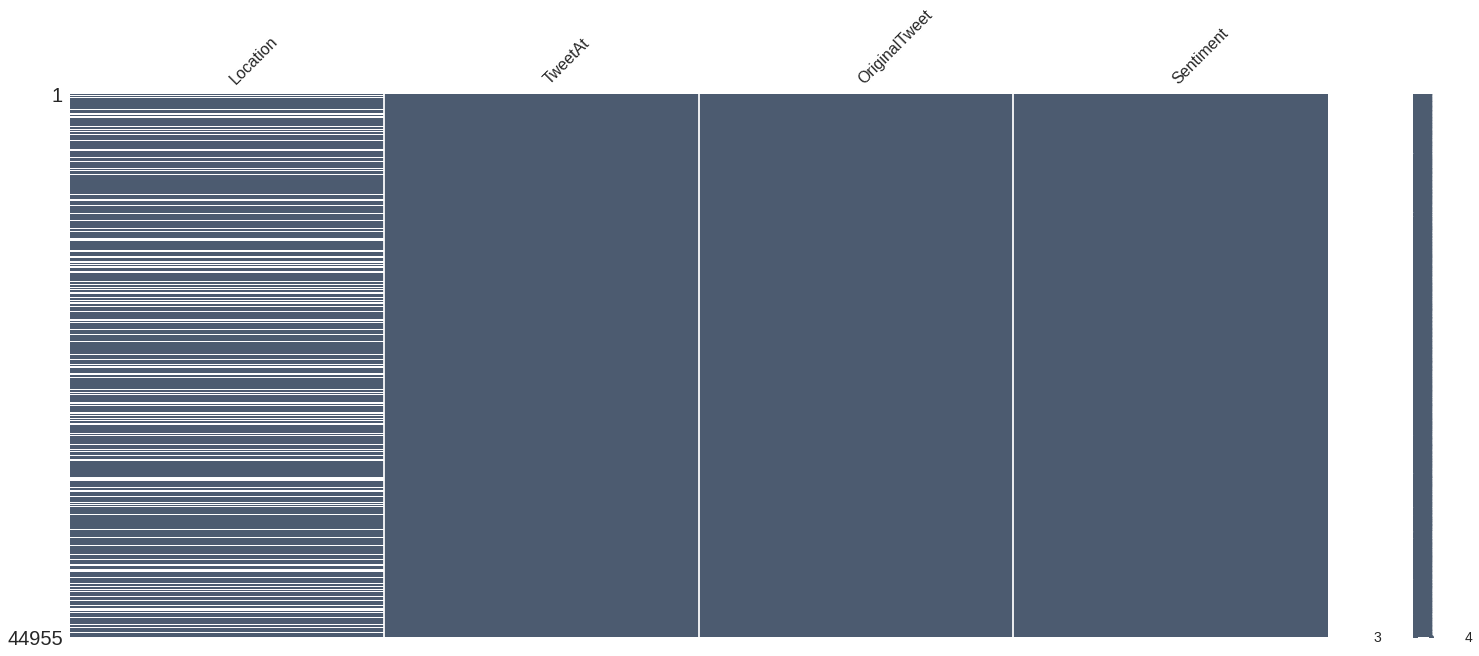

In [86]:
train_data=train_data.drop(columns=['UserName', 'ScreenName'])
test_data=test_data.drop(columns=['UserName', 'ScreenName'])
data=data.drop(columns=['UserName', 'ScreenName'])
data=data.drop_duplicates()
print("Shape after drop duplicates and useless columns", data.shape)
msno.matrix(data,color=(0.3,0.36,0.44))
print("NaN in data represented by white lines")

As we can see, we don't have any duplicated values in test and train data and we only have NaN in Location column. So its no necessary to aply any further filter.
Due this, we choose don't take any analysis about tweets, labels and Location.

Now let's take a look to the labels

Labels:  ['Neutral' 'Positive' 'Extremely Negative' 'Negative' 'Extremely Positive']
Counts for label
Positive              12369
Negative              10958
Neutral                8332
Extremely Positive     7223
Extremely Negative     6073
Name: Sentiment, dtype: int64


<AxesSubplot:ylabel='Sentiment'>

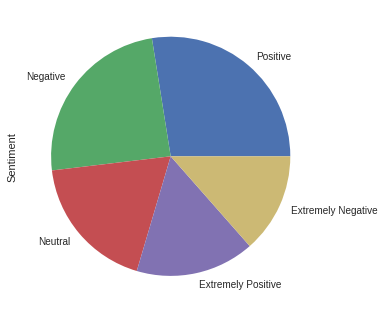

In [103]:
print("Labels: ", data.Sentiment.unique())
print("Counts for label")
print(data.Sentiment.value_counts())
data.Sentiment.value_counts().plot(kind='pie')